In [81]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,f1_score,roc_auc_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from collections import Counter

In [82]:
data = pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [83]:
data=data.drop("nameOrig",axis=1)
data=data.drop("nameDest",axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


Checking if all 'isFlaggedFraud' = 1 are Fraud or not

In [84]:
data.loc[data['isFlaggedFraud'] == 1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1


Since all the targeted rows are fraud so 'isFlaggedFraud' can be dropped

In [85]:
data=data.drop("isFlaggedFraud",axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [86]:
is_null = data.isnull().sum()
is_null

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

The data contains no null values

Encoding the categorical data in 'type'

In [87]:
lt = LabelEncoder()
data['type'] = lt.fit_transform(data['type'])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


Scaling the data using a min-max scaler

In [88]:
scaler = MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])
    return df


data = scaleColumns(data,['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step'])

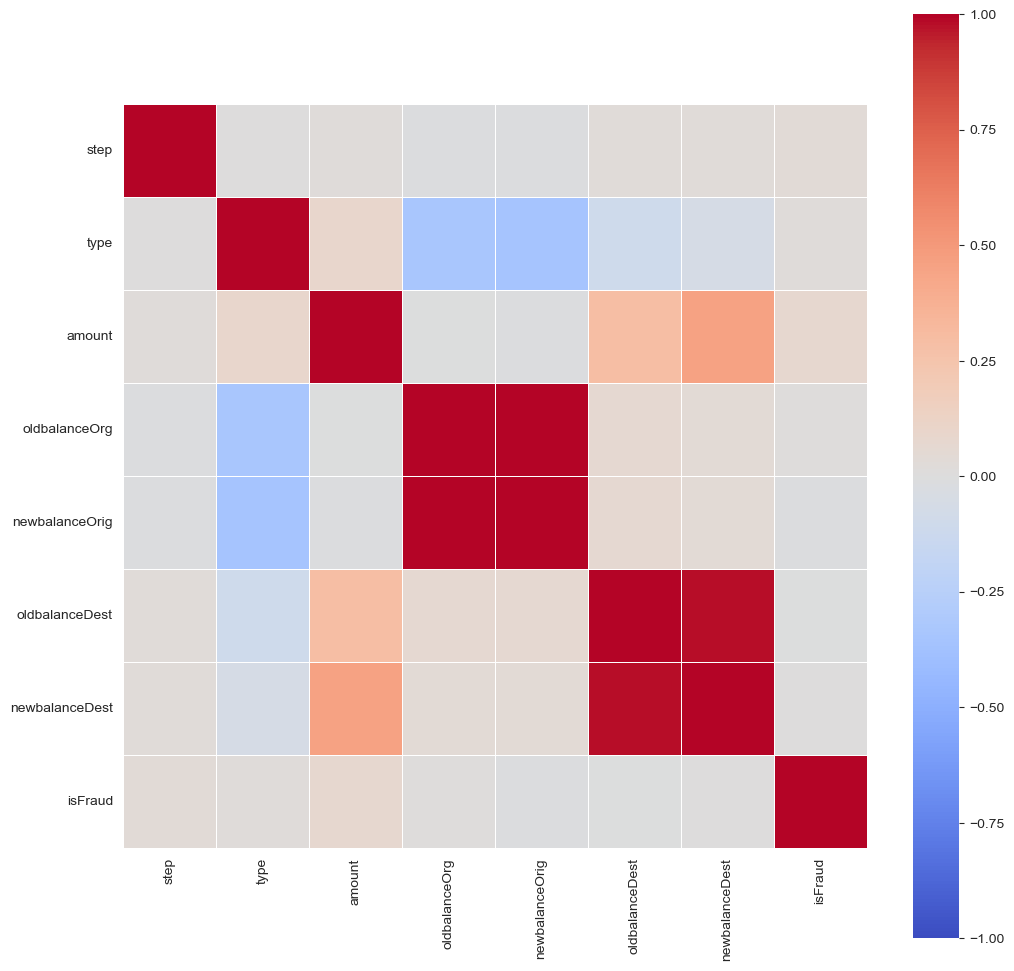

In [89]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), cmap='coolwarm', square=True, linewidths=0.5, vmin=-1, vmax=1);

In [90]:
data.corr()['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [91]:
X = data.drop('isFraud',axis=1)
y= data['isFraud']
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,3,0.000106,0.002855,0.003233,0.000000,0.0
1,0.0,3,0.000020,0.000357,0.000391,0.000000,0.0
2,0.0,4,0.000002,0.000003,0.000000,0.000000,0.0
3,0.0,1,0.000002,0.000003,0.000000,0.000059,0.0
4,0.0,3,0.000126,0.000697,0.000603,0.000000,0.0


In [92]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.3, shuffle=True)

In [93]:
X_train['isFraud'] = y_train

Checking the number of legit and fraud cases

In [94]:
X_train['isFraud'].value_counts()

0    4448131
1       5703
Name: isFraud, dtype: int64

As the legit cases are way more than that of fraud cases. So we have to reduce the number of legit cases. Using the Near Miss under sampler for reducing the number of majority class. According to Near Miss algorithm, if two points belonging to different classes are very close to each other in the distribution, then the algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

In [15]:
print('Original dataset shape %s' % Counter(y_train))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4448131, 1: 5703})
Resampled dataset shape Counter({0: 5703, 1: 5703})


Now the number of legit and fraud cases are equal.

In [16]:
X_res['isFraud'].value_counts()

0    5703
1    5703
Name: isFraud, dtype: int64

The target label is stored in 'y' and the variables are stored in 'X'.

In [17]:
X_res=X_res.drop("isFraud",axis=1)
X_res.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9,4,0.000151,0.000078,0.0,0.000000,0.000000
1,282,4,0.000304,0.000168,0.0,0.000008,0.000087
2,9,4,0.000067,0.000091,0.0,0.000008,0.000025
3,282,4,0.000229,0.000060,0.0,0.000000,0.000060
4,9,4,0.000200,0.000093,0.0,0.000000,0.000052


Using SVM on the undersampled data

In [28]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_res,y_res)

SVC(random_state=0)

In [29]:
predictions = classifier.predict(X_test)

F1_Score is  0.004616610453289019
Accuracy is  58.703228125101504
ROC AUC Score is  0.657566571736509


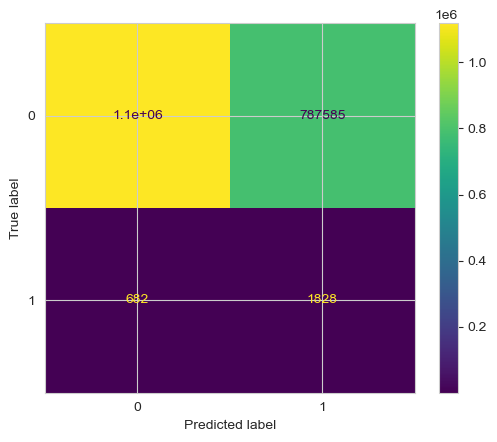

In [30]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
print('F1_Score is ',f1_score(y_test,predictions))
print('Accuracy is ',accuracy_score(y_test,predictions)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,predictions))

Using Logistic Regression on the undersampled data

In [32]:
clf = LogisticRegression(random_state=0,max_iter =10000000,verbose = 1).fit(X_res, y_res)
clf_prediction = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


F1_Score is  0.004202483684567255
Accuracy is  50.04652171589691
ROC AUC Score is  0.6508311729360913


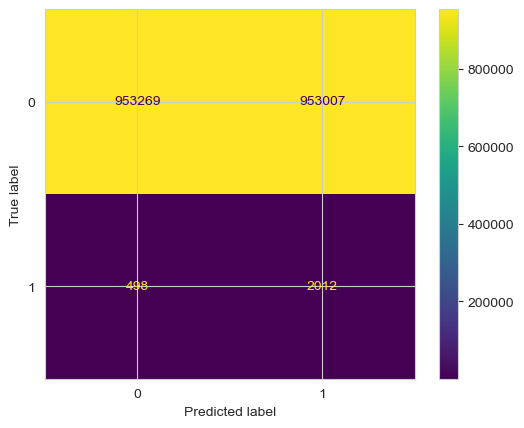

In [33]:
cm = confusion_matrix(y_test, clf_prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
print('F1_Score is ',f1_score(y_test,clf_prediction))
print('Accuracy is ',accuracy_score(y_test,clf_prediction)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,clf_prediction))

Using Random Forest Classifier on the undersampled data.

In [25]:
RFC = RandomForestClassifier(max_depth=10, random_state=0,verbose =1)
RFC.fit(X_res,y_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(max_depth=10, random_state=0, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.6s finished


F1_Score is  0.003440185223404248
Accuracy is  25.879223757927818
ROC AUC Score is  0.6153801625060351


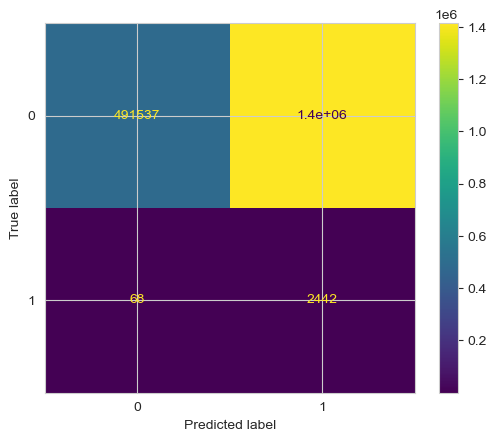

In [26]:
RFC_prediction = RFC.predict(X_test)
cm = confusion_matrix(y_test, RFC_prediction, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
print('F1_Score is ',f1_score(y_test,RFC_prediction))
print('Accuracy is ',accuracy_score(y_test,RFC_prediction)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,RFC_prediction))

Now trying the SMOTE oversampling technique. SMOTE first starts by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbor. This process is repeated until the distribution is balanced.

In [95]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))
x_smote=x_smote.drop("isFraud",axis=1)

Original dataset shape Counter({0: 4448131, 1: 5703})
Resample dataset shape Counter({0: 4448131, 1: 4448131})


Using SVM on oversampled data

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0,max_iter = 1000)
classifier.fit(x_smote,y_smote)

In [17]:
predictions = classifier.predict(X_test)

F1_Score is  0.016113569321533926
Accuracy is  91.61257469407256
ROC AUC Score is  0.7194775207151979


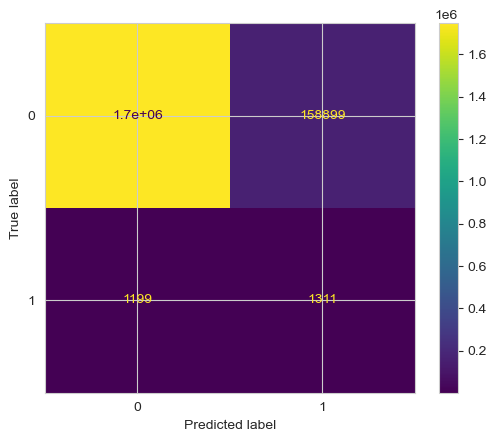

In [18]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
print('F1_Score is ',f1_score(y_test,predictions))
print('Accuracy is ',accuracy_score(y_test,predictions)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,predictions))

Using Logsitic Regression on oversampled data

In [44]:
clf = LogisticRegression(random_state=0,verbose = 1).fit(x_smote, y_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s finished


F1_Score is  0.03126277607188525
Accuracy is  94.16555863255493
ROC AUC Score is  0.8289445233529685


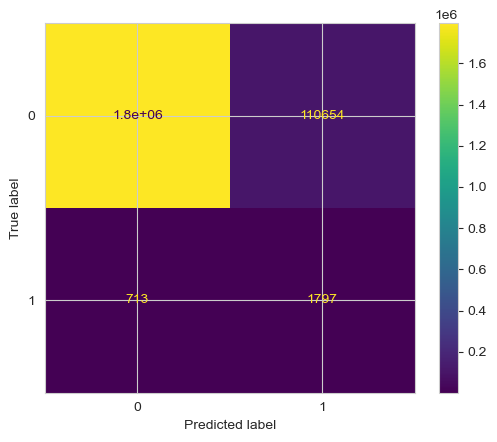

In [45]:
clf_prediction = clf.predict(X_test)
cm = confusion_matrix(y_test, clf_prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
print('F1_Score is ',f1_score(y_test,clf_prediction))
print('Accuracy is ',accuracy_score(y_test,clf_prediction)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,clf_prediction))

Random Forest Classifier with over sampling

In [16]:
RFC = RandomForestClassifier(max_depth=10, random_state=0,verbose =50)
RFC.fit(x_smote,y_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.1s remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.0s remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.3s remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.7min remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining: 

RandomForestClassifier(max_depth=10, random_state=0, verbose=50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

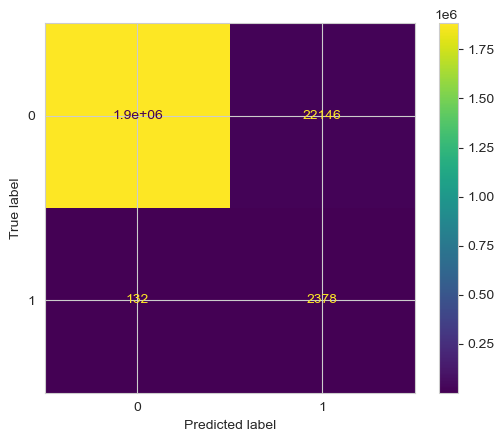

In [17]:
RFC_prediction = RFC.predict(X_test)
cm = confusion_matrix(y_test, RFC_prediction, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
disp.plot()
print('F1_Score is ',f1_score(y_test,RFC_prediction))
print('Accuracy is ',accuracy_score(y_test,RFC_prediction)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,RFC_prediction))

Using DNN (The best working model)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [97]:
model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
model.fit(x_smote, y_smote, epochs=50, batch_size=1000)

Epoch 1/50
8897/8897 [==============================] - 7s 712us/step - loss: 0.3452 - accuracy: 0.8391
Epoch 2/50
8897/8897 [==============================] - 6s 712us/step - loss: 0.1433 - accuracy: 0.9495
Epoch 3/50
8897/8897 [==============================] - 6s 711us/step - loss: 0.0744 - accuracy: 0.9791
Epoch 4/50
8897/8897 [==============================] - 6s 717us/step - loss: 0.0588 - accuracy: 0.9841
Epoch 5/50
8897/8897 [==============================] - 6s 712us/step - loss: 0.0524 - accuracy: 0.9861
Epoch 6/50
8897/8897 [==============================] - 6s 713us/step - loss: 0.0483 - accuracy: 0.9873
Epoch 7/50
8897/8897 [==============================] - 6s 718us/step - loss: 0.0450 - accuracy: 0.9881
Epoch 8/50
8897/8897 [==============================] - 6s 723us/step - loss: 0.0419 - accuracy: 0.9888
Epoch 9/50
8897/8897 [==============================] - 6s 720us/step - loss: 0.0381 - accuracy: 0.9895
Epoch 10/50
8897/8897 [==============================] - 6s 713u

In [100]:
predictions = (model.predict(X_test) > 0.5).astype(int)

59650/59650 [==============================] - 26s 434us/step


In [101]:
predictions = predictions.reshape(1908786)

F1_Score is  0.42595276664677295
Accuracy is  99.6472627104348
ROC AUC Score is  0.9958467005513573


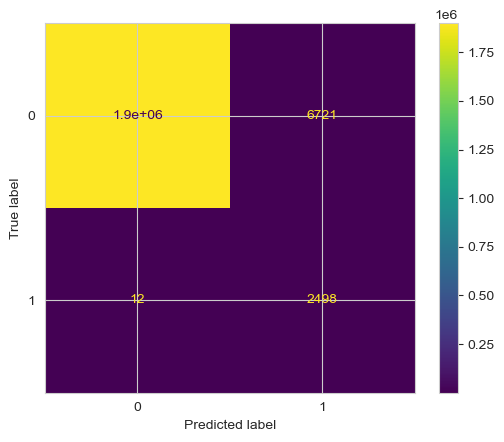

In [102]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('F1_Score is ',f1_score(y_test,predictions))
print('Accuracy is ',accuracy_score(y_test,predictions)*100)
print('ROC AUC Score is ',roc_auc_score(y_test,predictions))